In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import and Prep Data

In [2]:
feature_data = pd.read_csv('data/train_features.csv')
salary_data = pd.read_csv('data/train_salaries.csv')

In [3]:
feature_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
salary_data.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [5]:
# join the two together on jobId
all_data = feature_data.merge(salary_data, how = 'inner', on='jobId',validate='1:1')

In [6]:
all_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [7]:
#split into two groups
#create two lists, which will later be converted to dataframes
# apparently it is less computationally intensive to append to a list then to a df
# according to https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html
all_data_test = []
all_data_train = []

#create a list of integers that is a certain percent of the
#length of the dataset, which will be the rows that end up in 
#the test dataset
test_rand_int = np.random.randint(0,len(all_data)-1,int(len(all_data)*0.2))

# for i in range(0, len(all_data)):
#   foo = np.random.randint(0, 10)
#   if (foo < 2) 
#      all_data_test.append(all_data.iloc[i])
#   else
#      all_data_train.append(all_data.iloc[i])

####################################
###timing the following for loops###
####################################
import time
start_time = time.perf_counter()
####################################
# create the two datasets
for i in range(0,len(all_data)):
    if i in test_rand_int:
        all_data_test.append(all_data.iloc[i])
    else:
        all_data_train.append(all_data.iloc[i])

####################################
end_time = time.perf_counter()
####################################

#convert to df
all_data_test = pd.DataFrame(all_data_test)
all_data_train = pd.DataFrame(all_data_train)

## this section took awhile to run, should time this and also find a more efficient method 
# takes about 17 minutes to run the for loops

In [8]:
print(start_time, end_time)

45.7861764 1046.7516649


In [9]:
len(all_data_train)

818876

In [10]:
len(all_data_test)

181124

In [11]:
# assuming that all data is unique in the original dataset
# however, just because there are 1million unique jobIds does not mean this is the case

# Exploratory Data Analysis

In [12]:
#look at each column

#companyId
all_data_train['companyId'].nunique()

63

In [13]:
all_data_train['companyId'].value_counts().sort_values() #visual might be better here

COMP57    12706
COMP2     12791
COMP12    12814
COMP8     12838
COMP0     12839
          ...  
COMP3     13149
COMP40    13168
COMP35    13195
COMP59    13196
COMP39    13235
Name: companyId, Length: 63, dtype: int64

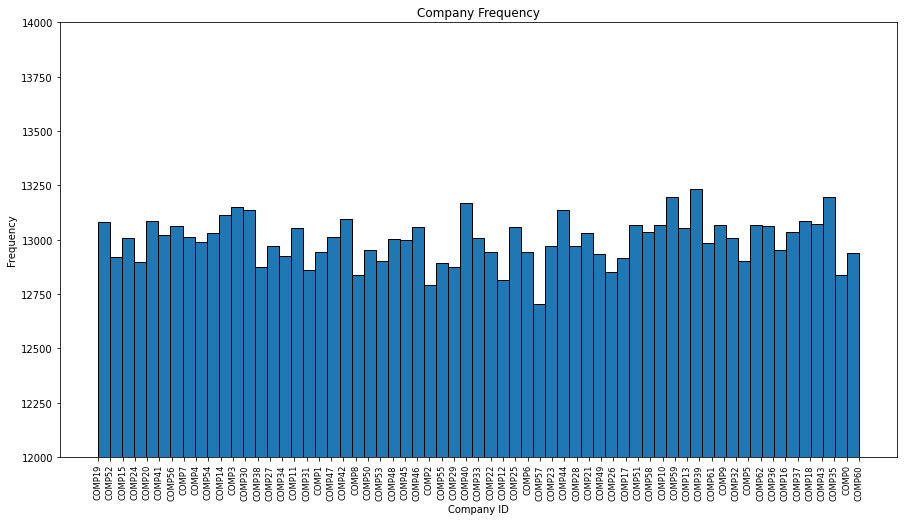

In [14]:
plt.figure(figsize = (15,8))
plt.hist(all_data_train['companyId'], bins = 63, edgecolor = 'black')
plt.title('Company Frequency')
plt.xlabel('Company ID')
plt.ylabel('Frequency')
plt.ylim(12000,14000)
plt.xticks(rotation=90,fontweight='medium',fontsize='small')
plt.show() # hist displays without this, but this gets rid of all of the extra data

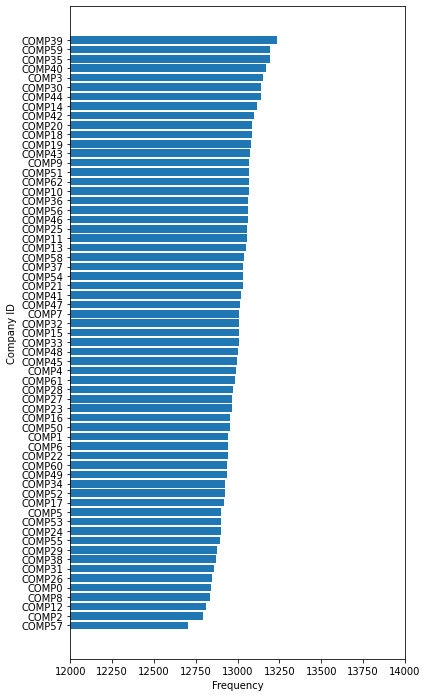

In [15]:
# another way to look at it
fig, ax = plt.subplots(figsize = (6,12))
ax.barh(all_data_train['companyId'].value_counts().sort_values().index,all_data_train['companyId'].value_counts().sort_values())
ax.set_xlim(12000,14000)
ax.set_ylabel('Company ID')
ax.set_xlabel('Frequency')
plt.show()

In [16]:
# looks like each company appears between 12750 and 13250 times out of 818K data points, a range of 500

In [17]:
#jobType
all_data_train['jobType'].nunique()

8

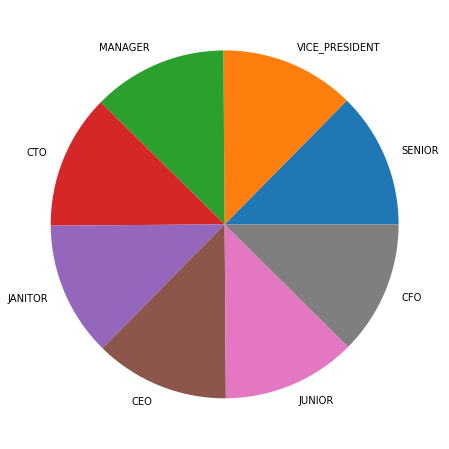

In [18]:
fig, ax = plt.subplots(figsize = (8,8))
plt.pie(all_data_train['jobType'].value_counts(), labels = all_data_train['jobType'].value_counts().index)
plt.show()

In [19]:
# looks a bit suspicious, let's check that it's accurate
all_data_train['jobType'].value_counts()/len(all_data_train)

SENIOR            0.126036
VICE_PRESIDENT    0.125113
MANAGER           0.125073
CTO               0.124974
JANITOR           0.124965
CEO               0.124959
JUNIOR            0.124486
CFO               0.124394
Name: jobType, dtype: float64

In [20]:
#about 12.5% of each jobType, what an odd dataset

In [21]:
# is there a correlation between jobType and salary
all_data_train.groupby(['jobType']).mean()['salary']

jobType
CEO               145.300217
CFO               135.346465
CTO               135.495622
JANITOR            70.775063
JUNIOR             95.296511
MANAGER           115.352610
SENIOR            105.479459
VICE_PRESIDENT    125.297134
Name: salary, dtype: float64

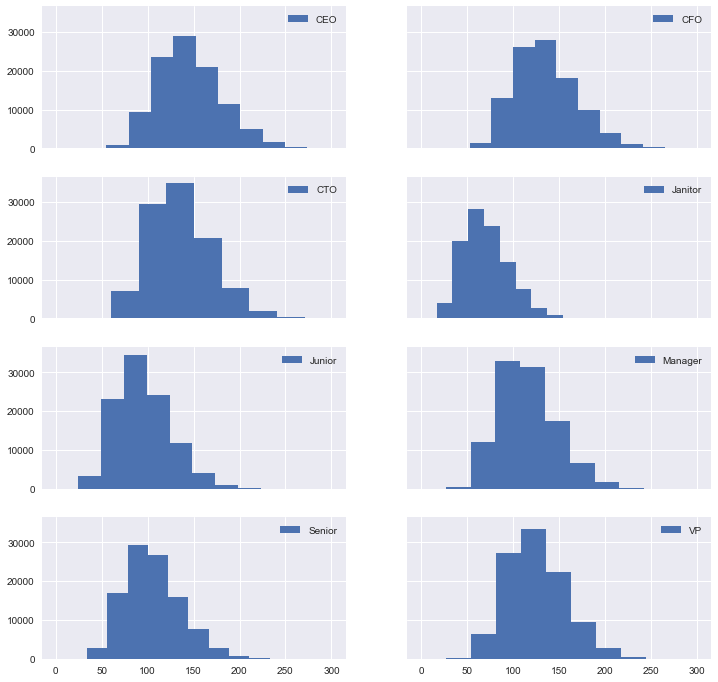

In [22]:
# plot salary by jobType
# use subplots here
plt.style.use('seaborn')
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,2,figsize=(12,12),sharex=True,sharey=True)

ax1[0].hist(all_data_train[all_data_train['jobType'] == 'CEO']['salary'], label = 'CEO')
ax1[1].hist(all_data_train[all_data_train['jobType'] == 'CFO']['salary'], label = 'CFO')
ax2[0].hist(all_data_train[all_data_train['jobType'] == 'CTO']['salary'], label = 'CTO')
ax2[1].hist(all_data_train[all_data_train['jobType'] == 'JANITOR']['salary'], label = 'Janitor')
ax3[0].hist(all_data_train[all_data_train['jobType'] == 'JUNIOR']['salary'], label = 'Junior')
ax3[1].hist(all_data_train[all_data_train['jobType'] == 'MANAGER']['salary'], label = 'Manager')
ax4[0].hist(all_data_train[all_data_train['jobType'] == 'SENIOR']['salary'], label = 'Senior')
ax4[1].hist(all_data_train[all_data_train['jobType'] == 'VICE_PRESIDENT']['salary'], label = 'VP')
ax1[0].legend()
ax1[1].legend()
ax2[0].legend()
ax2[1].legend()
ax3[0].legend()
ax3[1].legend()
ax4[0].legend()
ax4[1].legend()
plt.show()

#next time, put this into a for loop

In [23]:
# C-level, Manager, and VP have a wider range with the highest maximums, and janitor's salary range is on the lower end.
# The bulk of the C-level job salaries are greater than the Senior and Manager, but the ranges aren't that different, which is surprising

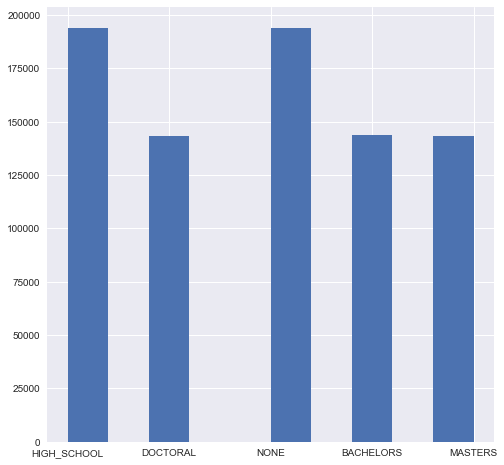

In [24]:
#degree
fig, ax = plt.subplots(figsize = (8,8))
ax.hist(all_data_train['degree'])
plt.show()

In [25]:
# break the data up by degree and jobType

#labels = all_data_train['jobType'].sort_values().unique()
#fig, ax = plt.subplots()
# for every job type, count the number of each type of degree
#ax.bar(all_data_train['degree'].value_counts())

#skipping this for now, need to understand the various plot implementations better

In [26]:
# roughly, the data is evenly split between high school and lower, and bachelor's or higher

In [27]:
#major
all_data_train['major'].value_counts()

NONE           436215
CHEMISTRY       48154
LITERATURE      48112
BUSINESS        48080
PHYSICS         47826
COMPSCI         47826
ENGINEERING     47762
BIOLOGY         47672
MATH            47229
Name: major, dtype: int64

In [28]:
#any empty strings?
all_data_train['major'] == ''

1         False
2         False
5         False
6         False
7         False
          ...  
999995    False
999996    False
999997    False
999998    False
999999    False
Name: major, Length: 818876, dtype: bool

In [29]:
#about half of the data points have no major, and the other half are about equally split at around 47k

In [30]:
#majors by degree type
all_data_train[['major','degree']].value_counts()

major        degree     
NONE         HIGH_SCHOOL    194156
             NONE           194103
             DOCTORAL        16159
LITERATURE   MASTERS         16150
CHEMISTRY    BACHELORS       16135
COMPSCI      BACHELORS       16131
PHYSICS      MASTERS         16116
ENGINEERING  BACHELORS       16085
LITERATURE   DOCTORAL        16078
CHEMISTRY    MASTERS         16055
BUSINESS     DOCTORAL        16050
             MASTERS         16019
             BACHELORS       16011
CHEMISTRY    DOCTORAL        15964
NONE         BACHELORS       15957
BIOLOGY      BACHELORS       15941
PHYSICS      BACHELORS       15910
COMPSCI      MASTERS         15907
BIOLOGY      MASTERS         15901
LITERATURE   BACHELORS       15884
ENGINEERING  DOCTORAL        15865
NONE         MASTERS         15840
BIOLOGY      DOCTORAL        15830
ENGINEERING  MASTERS         15812
PHYSICS      DOCTORAL        15800
COMPSCI      DOCTORAL        15788
MATH         DOCTORAL        15782
             MASTERS         1

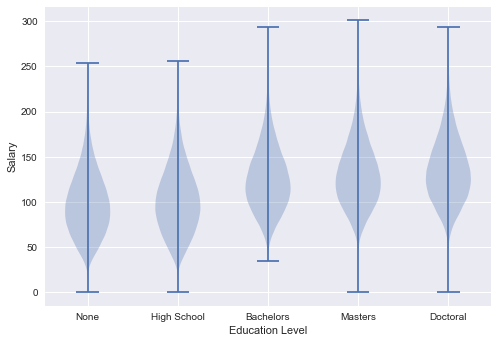

In [69]:
#salary by degree comparison
degree_none = all_data_train[all_data_train['degree'] == 'NONE']['salary']
degree_hs = all_data_train[all_data_train['degree'] == 'HIGH_SCHOOL']['salary']
degree_bach = all_data_train[all_data_train['degree'] == 'BACHELORS']['salary']
degree_master = all_data_train[all_data_train['degree'] == 'MASTERS']['salary']
degree_phd = all_data_train[all_data_train['degree'] == 'DOCTORAL']['salary']

fig, ax = plt.subplots()
ax.violinplot([degree_none,degree_hs,degree_bach,degree_master,degree_phd])
ax.set_xlabel('Education Level')
ax.set_ylabel('Salary')
ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels(['None','High School','Bachelors','Masters','Doctoral'])
plt.show()

In [ ]:
# widest range in salary occurs with the Master's degree
# the biggest shift in salary comes from the Bachelor's degree
# distributions of none and hs seem to about the same
# distributions of Masters and Doctoral seem to be about the same

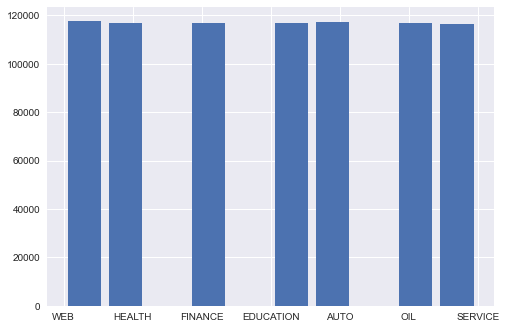

In [31]:
#industry
fig, ax = plt.subplots()
ax.hist(all_data_train['industry'], rwidth = 0.8)
plt.show()

In [32]:
#evenly distributed across industries

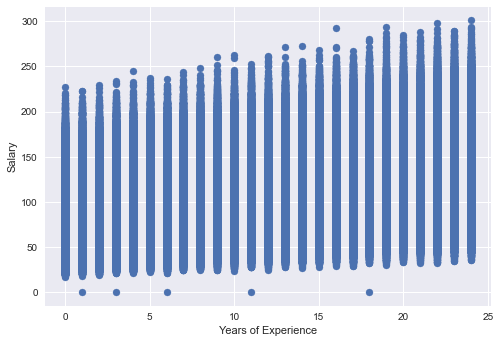

In [33]:
#yearsExperience
fig, ax = plt.subplots()
ax.scatter(all_data_train['yearsExperience'],all_data_train['salary'])
ax.set_xlabel('Years of Experience')
ax.set_ylabel('Salary')
plt.show()

In [34]:
# there seems to be some 0 salaries
all_data_train[all_data_train['salary']==0]
#should these 4 data points be removed?
#does pandas change empty or null values to 0 when reading file?

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


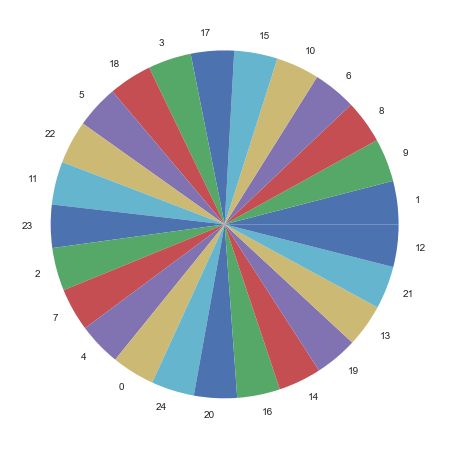

In [35]:
#yearsExperience
fig, ax = plt.subplots(figsize = (8,8))
plt.pie(all_data_train['yearsExperience'].value_counts(), labels = all_data_train['yearsExperience'].value_counts().index)
plt.show()

In [40]:
all_data_train[['yearsExperience','salary']].corr()
#linear correlation between years of experience and salary is pretty low

,yearsExperience,salary
yearsExperience,1.000000,0.375378
salary,0.375378,1.000000


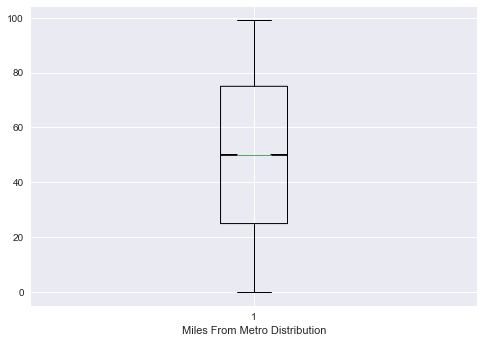

In [50]:
#miles from Metro
fig, ax = plt.subplots()
ax.boxplot(all_data_train['milesFromMetropolis'], notch=True)
ax.set_xlabel('Miles From Metro Distribution')
plt.show()

In [52]:
# seems like 50 is the median miles from metropolis, with 50% of the data being between ~ 25 and 75 miles
# outliers at 0 and 100 miles

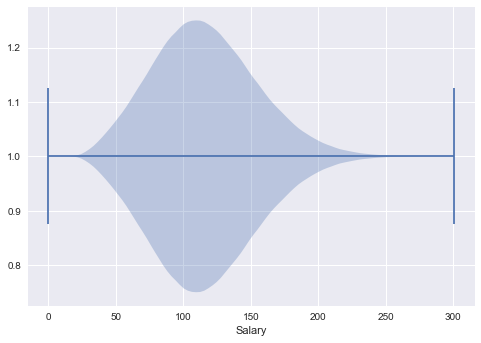

In [71]:
#salary
fig, ax = plt.subplots()
ax.violinplot(all_data_train['salary'],vert = False)
ax.set_xlabel('Salary')
plt.show()

**Data Summary** <br />
companyId - 63 unique, range  for each is 12750-13250 <br />
jobType - 8 unique, each is about 12.5% of total <br />
degree - high school and none are at about 190K, bachelor's, master's, doctoral at about 140K <br />
major - about half have no major listed, the other half are evenly split at around 47K <br />
industry - evenly distributed across all industries, around 119K <br />
yearsExperience - ranges from 0 to 24, data is pretty evenly split among the years <br />
milesfromMetropolis - median is 50, range is 0 to 100, 50% of data is between 25 and 75 miels <br />
salary - normal looking distribution, but right tail is slightly longer than left, mode is between 100 and 125

# One hot encoding categorial variables

In [72]:
# companyId, jobType, degree, major, industry

In [74]:
all_data_train_enc = pd.get_dummies(all_data_train, prefix = ['co','job','deg','mjr','ind'], columns = ['companyId','jobType','degree','major','industry'], drop_first = True)

In [145]:
all_data_train_enc

,jobId,yearsExperience,milesFromMetropolis,salary,co_COMP1,co_COMP10,co_COMP11,co_COMP12,co_COMP13,co_COMP14,...,mjr_LITERATURE,mjr_MATH,mjr_NONE,mjr_PHYSICS,ind_EDUCATION,ind_FINANCE,ind_HEALTH,ind_OIL,ind_SERVICE,ind_WEB
1,JOB1362684407688,3,73,101,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,JOB1362684407689,10,38,137,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
5,JOB1362684407692,2,31,113,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,JOB1362684407693,23,24,178,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
7,JOB1362684407694,9,70,73,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,19,94,88,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
999996,JOB1362685407683,12,35,160,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
999997,JOB1362685407684,16,81,64,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
999998,JOB1362685407685,6,5,149,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


# Fit the Linear Model

In [77]:
from sklearn.linear_model import LinearRegression

In [146]:
lm = LinearRegression()

In [147]:
y = all_data_train_enc[['salary']]
x = all_data_train_enc.iloc[:,1:] # remove jobId column
x = x.drop(labels = 'salary',axis = 1)

In [148]:
x.head()  

,yearsExperience,milesFromMetropolis,co_COMP1,co_COMP10,co_COMP11,co_COMP12,co_COMP13,co_COMP14,co_COMP15,co_COMP16,...,mjr_LITERATURE,mjr_MATH,mjr_NONE,mjr_PHYSICS,ind_EDUCATION,ind_FINANCE,ind_HEALTH,ind_OIL,ind_SERVICE,ind_WEB
1,3,73,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,10,38,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
5,2,31,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,23,24,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
7,9,70,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [149]:
lm.fit(x,y)

LinearRegression()

# Update Test Set to Match Training Set

In [150]:
all_data_test.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
14,JOB1362684407701,COMP57,JANITOR,NONE,NONE,AUTO,21,81,47
17,JOB1362684407704,COMP61,VICE_PRESIDENT,MASTERS,LITERATURE,SERVICE,23,43,126


In [151]:
all_data_test_enc = pd.get_dummies(all_data_test, prefix = ['co','job','deg','mjr','ind'], columns = ['companyId','jobType','degree','major','industry'], drop_first = True)

In [152]:
all_data_test_enc.head()

,jobId,yearsExperience,milesFromMetropolis,salary,co_COMP1,co_COMP10,co_COMP11,co_COMP12,co_COMP13,co_COMP14,...,mjr_LITERATURE,mjr_MATH,mjr_NONE,mjr_PHYSICS,ind_EDUCATION,ind_FINANCE,ind_HEALTH,ind_OIL,ind_SERVICE,ind_WEB
0,JOB1362684407687,10,83,130,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,JOB1362684407690,8,17,142,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,JOB1362684407691,8,16,163,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
14,JOB1362684407701,21,81,47,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
17,JOB1362684407704,23,43,126,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [153]:
y_test = all_data_test_enc[['salary']]

In [154]:
print(len(y_test))
y_test.head()

181124


,salary
0,130
3,142
4,163
14,47
17,126


In [155]:
x_test = all_data_test_enc.iloc[:,1:] # remove jobID column
x_test = x_test.drop(labels = 'salary', axis = 1) #remove salary column
x_test.head()

,yearsExperience,milesFromMetropolis,co_COMP1,co_COMP10,co_COMP11,co_COMP12,co_COMP13,co_COMP14,co_COMP15,co_COMP16,...,mjr_LITERATURE,mjr_MATH,mjr_NONE,mjr_PHYSICS,ind_EDUCATION,ind_FINANCE,ind_HEALTH,ind_OIL,ind_SERVICE,ind_WEB
0,10,83,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,8,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,16,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
14,21,81,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
17,23,43,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


# Prediction & Model Assessment

In [156]:
predictions = lm.predict(x_test)

In [157]:
predictions

array([[128.05736074],
       [125.26954577],
       [147.8609914 ],
       ...,
       [ 85.39344767],
       [127.0593117 ],
       [ 76.55410706]])

In [158]:
len(predictions)

181124

In [163]:
#type(predictions) #np ndarray
#type(y_test) #pd df
pd.concat([y_test,pd.DataFrame(predictions)], axis = 1, ignore_index = True, names = ['Salary','Prediction'])

,0,1
0,130.0,128.057361
1,NaN,125.269546
2,NaN,147.860991
3,142.0,67.785620
4,163.0,140.656027
...,...,...
999966,96.0,NaN
999971,115.0,NaN
999975,97.0,NaN
999980,84.0,NaN


In [166]:
residuals = np.array(y_test) - predictions
residuals

array([[  1.94263926],
       [ 16.73045423],
       [ 15.1390086 ],
       ...,
       [ 11.60655233],
       [-43.0593117 ],
       [ 12.44589294]])

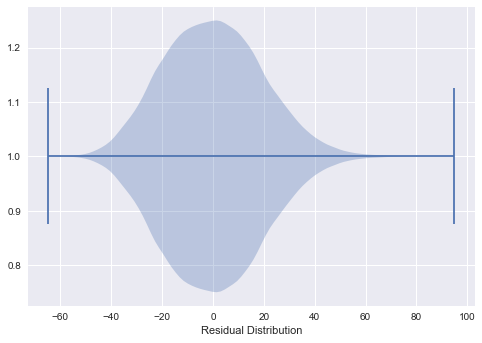

In [171]:
#plot residuals
fig, ax = plt.subplots()
ax.violinplot(residuals, vert = False)
ax.set_xlabel('Residual Distribution')
plt.show()

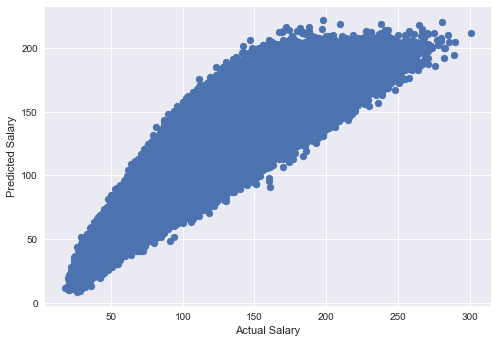

In [176]:
# actual vs predicted
fig, ax = plt.subplots()
ax.scatter(np.array(y_test),predictions)
ax.set_xlabel('Actual Salary')
ax.set_ylabel('Predicted Salary')
plt.show()

In [179]:
from sklearn import metrics
print('MAE: ',metrics.mean_absolute_error(y_test, predictions))
print('MSE: ',metrics.mean_squared_error(y_test, predictions))
print('RMSE: ',np.sqrt(metrics.mean_absolute_error(y_test, predictions)))

MAE:  15.80103686237507
MSE:  382.7876421389037
RMSE:  3.9750518062504634
